# Import libraries

In [390]:
import pandas as pd
import numpy as np

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import datetime

import warnings
warnings.filterwarnings("ignore")

# EDA

In [391]:
# Impot dataset
df = pd.read_csv(r'C:\Users\33760\Desktop\FULLSTACK\FULLSTACK\Projet\BLOC 3\Walmart\data\Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [392]:
# Display some dataset characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [393]:
# Display some statistics
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [394]:
print('This data set has {} rows'.format(df.shape[0]))
print('This data set has {} columns'.format(df.shape[1]))

This data set has 150 rows
This data set has 8 columns


### Missing Values ?

In [395]:
df.isnull().any()

Store           False
Date             True
Weekly_Sales     True
Holiday_Flag     True
Temperature      True
Fuel_Price       True
CPI              True
Unemployment     True
dtype: bool

In [396]:
df.isnull().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [397]:
# Missing values rate in columns
(df.isnull().sum())/(df.shape[0])*100


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [398]:
df.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

# Preprocessing

In [399]:
# Drop NaN values for the 'Weekly_Sales' column (label)
mask = (df['Weekly_Sales'] > 0) & (df['Weekly_Sales'] != 'NaN')

# Apply mask
df = df.loc[mask, :]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [400]:
df.isnull().sum()

Store            0
Date            18
Weekly_Sales     0
Holiday_Flag    11
Temperature     15
Fuel_Price      12
CPI             11
Unemployment    14
dtype: int64

No missing values in Weekly_Sales anymore

### Manage 'Date' Column

In [401]:
# # Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract the year, month, day and day of the week in separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [402]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


In [403]:
# Delete the date column
df = df.drop('Date', axis=1)

In [404]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

In [405]:
df["Year"].nunique(), df["Month"].nunique(), df["Day"].nunique(), df['Weekday'].nunique()

(3, 12, 30, 1)

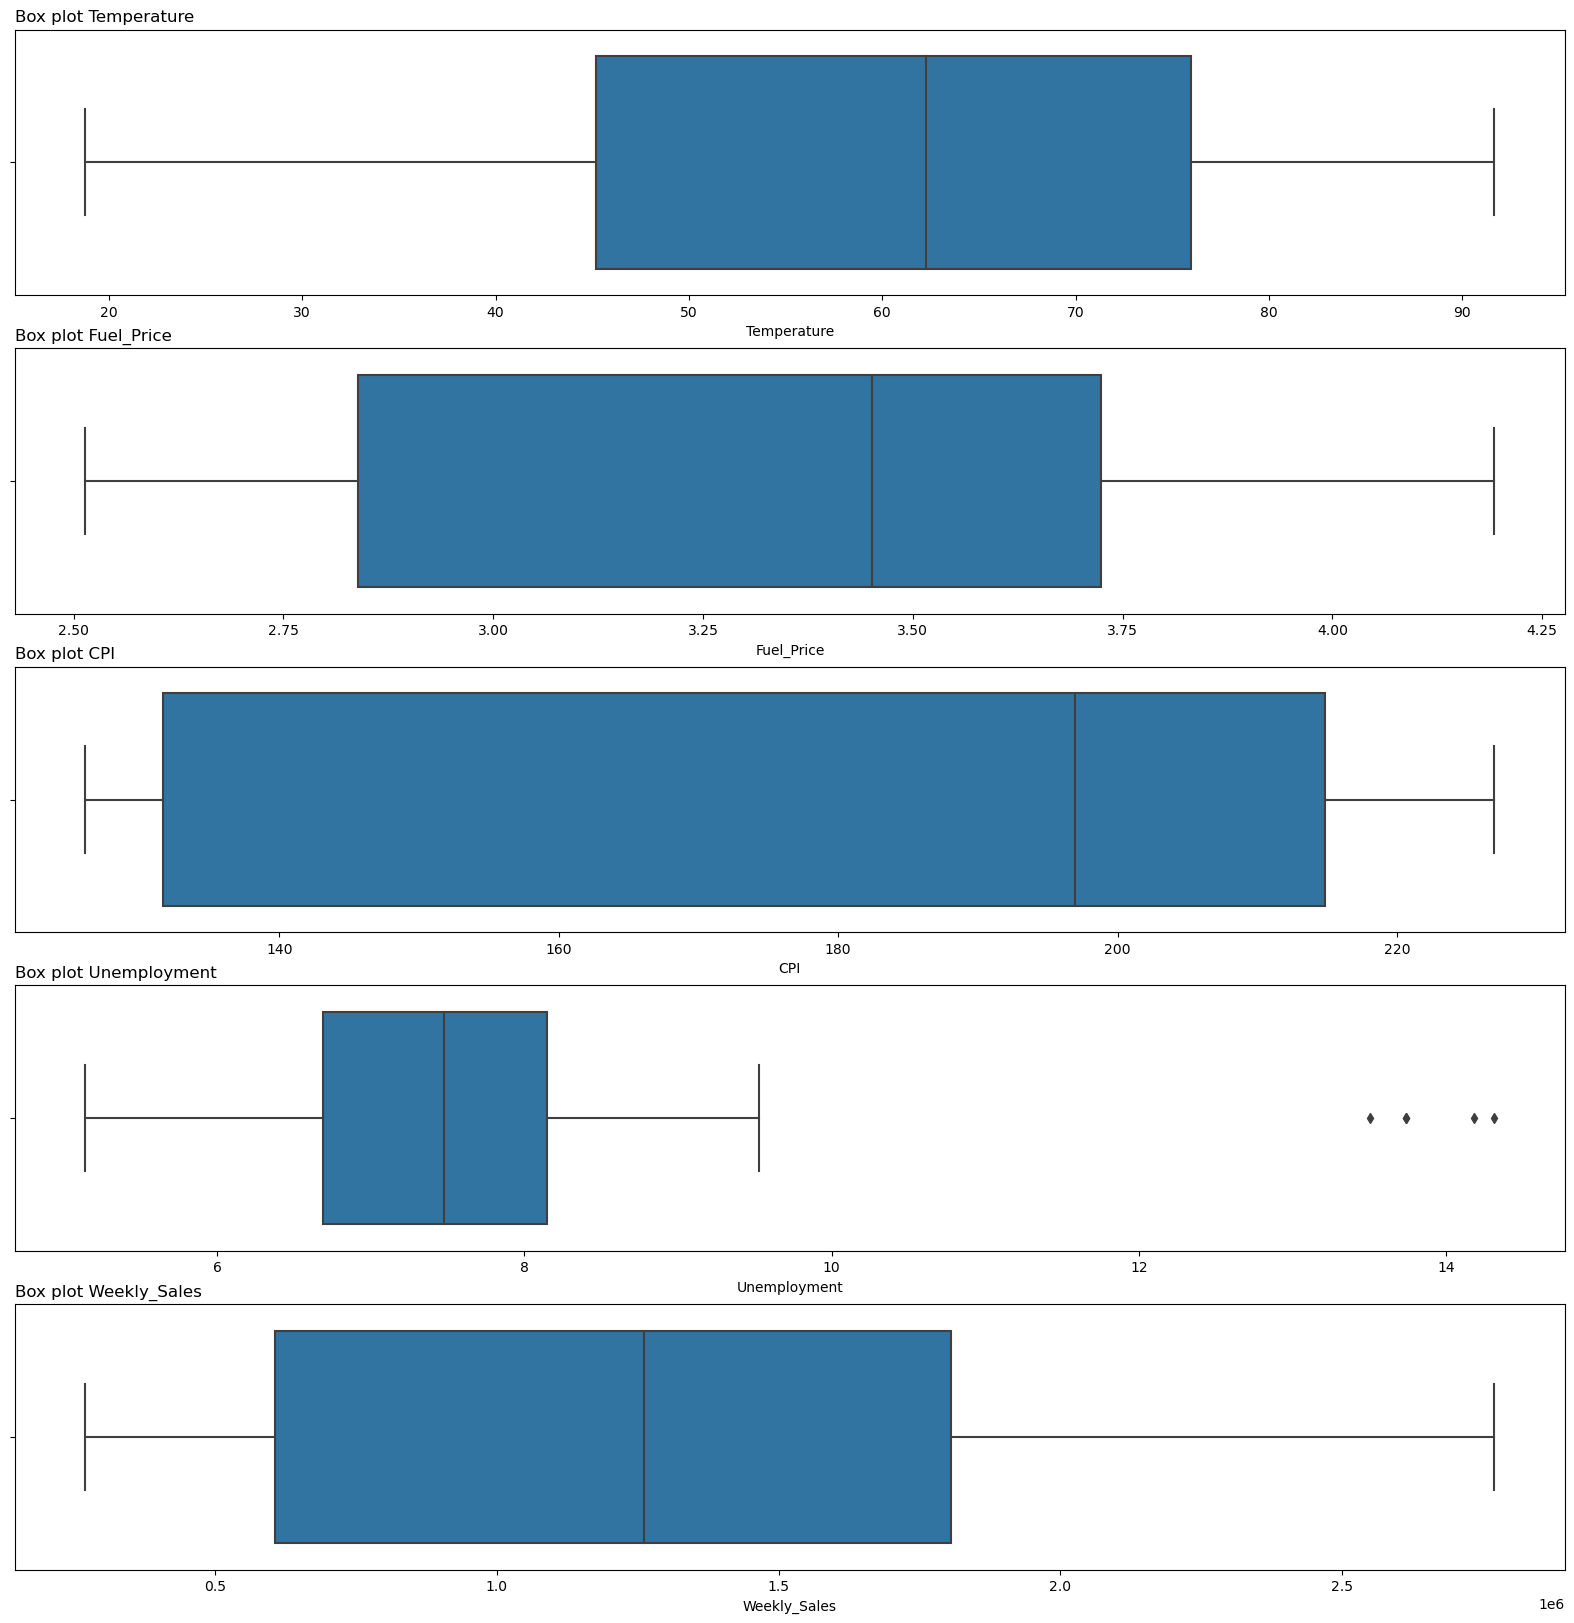

In [406]:
# manage outliers and underliers

# Initialiser une figure avec 3 sous-graphiques sur 3 lignes
fig, axes = plt.subplots(nrows=5, figsize=(20, 20))

# Créer un boxplot pour chaque axe
sns.boxplot(x= 'Temperature', data = df, ax=axes[0], whis = 3, fliersize = 5)
sns.boxplot(x= 'Fuel_Price',data = df, ax=axes[1], whis = 3, fliersize = 5)
sns.boxplot(x= 'CPI', data = df, ax=axes[2], whis = 3, fliersize = 5)
sns.boxplot(x= 'Unemployment', data = df, ax=axes[3], whis = 3, fliersize = 5)
sns.boxplot(x= 'Weekly_Sales', data = df, ax=axes[4], whis = 3, fliersize = 5)

# Ajouter des titres pour chaque sous-graphique
axes[0].set_title("Box plot Temperature", loc = 'left')
axes[1].set_title("Box plot Fuel_Price", loc = 'left')
axes[2].set_title("Box plot CPI", loc = 'left')
axes[3].set_title("Box plot Unemployment", loc = 'left')
axes[4].set_title("Box plot Weekly_Sales", loc = 'left')


# Afficher la figure
plt.show()

In [407]:
# Set the limit of outliers/underliers to three standard deviations from the mean (99.7%)
upper_bound = df['Unemployment'].mean() + df['Unemployment'].std()*3
lower_bound = df['Unemployment'].mean() - df['Unemployment'].std()*3

In [408]:
# Create Mask
mask = (df['Unemployment'] < upper_bound) & (df['Unemployment'] > lower_bound)   

# Apply Mask
df = df.loc[mask,:]
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


<AxesSubplot:xlabel='Unemployment'>

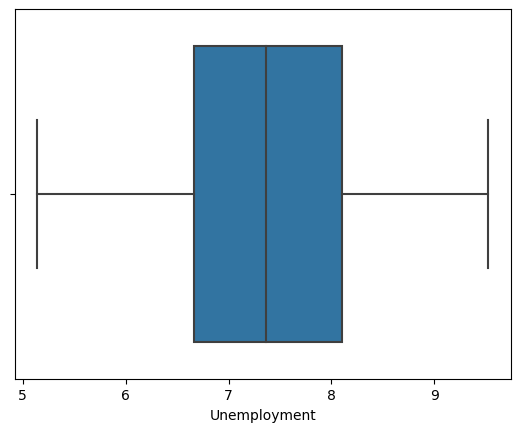

In [409]:
sns.boxplot(x= 'Unemployment', data = df, whis = 3, fliersize = 5)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         117 non-null    float64
 1   Weekly_Sales  117 non-null    float64
 2   Holiday_Flag  107 non-null    float64
 3   Temperature   106 non-null    float64
 4   Fuel_Price    106 non-null    float64
 5   CPI           108 non-null    float64
 6   Unemployment  117 non-null    float64
 7   Year          102 non-null    float64
 8   Month         102 non-null    float64
 9   Day           102 non-null    float64
 10  Weekday       102 non-null    float64
dtypes: float64(11)
memory usage: 11.0 KB


In [411]:
# Convert "Store" and "Holiday_Flag" columns to object type
df['Store'] = df['Store'].astype(str)
df['Holiday_Flag'] = df['Holiday_Flag'].astype(str)

print(df.dtypes)

Store            object
Weekly_Sales    float64
Holiday_Flag     object
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year            float64
Month           float64
Day             float64
Weekday         float64
dtype: object


# Univariate Analysis : 

### Numerical features

In [412]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,6.0,1572117.54,nan,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


In [413]:
# Select "float" type columns except target
float_col = df.select_dtypes(include=['float64']).columns.drop('Weekly_Sales')

print(float_col)

Index(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month',
       'Day', 'Weekday'],
      dtype='object')


In [414]:
# Brows columns and plot their distribution
for column in float_col:
    fig = px.histogram(df, x=column, nbins=30, title=f"Distribution of {column}")
    fig.show()


Some numerical values seem to follow a normal pattern, while others do not.

### Categorical features

In [415]:
# Select columns of type "object"
cat_col = df.select_dtypes(include=['object']).columns

print(cat_col)

Index(['Store', 'Holiday_Flag'], dtype='object')


In [416]:
# Parcours des colonnes et tracé de leur distribution
for column in cat_col:
    fig = px.bar(df, x=column, title=f"Distribution of {column}", color = column)
    fig.show()

Stores 3, 18 and 13 have more data than the others.

### Target Analysis

In [417]:
fig = px.histogram(x = df['Weekly_Sales'], nbins = 15, title = "Distribution of target variable")
fig.show()

Une grande partie des données du label sont consentreées les intervalles [0, 600000] et [1.4, 2.2 millions] dollars

# Bivariate Analysis

### Weekly_sales & Store

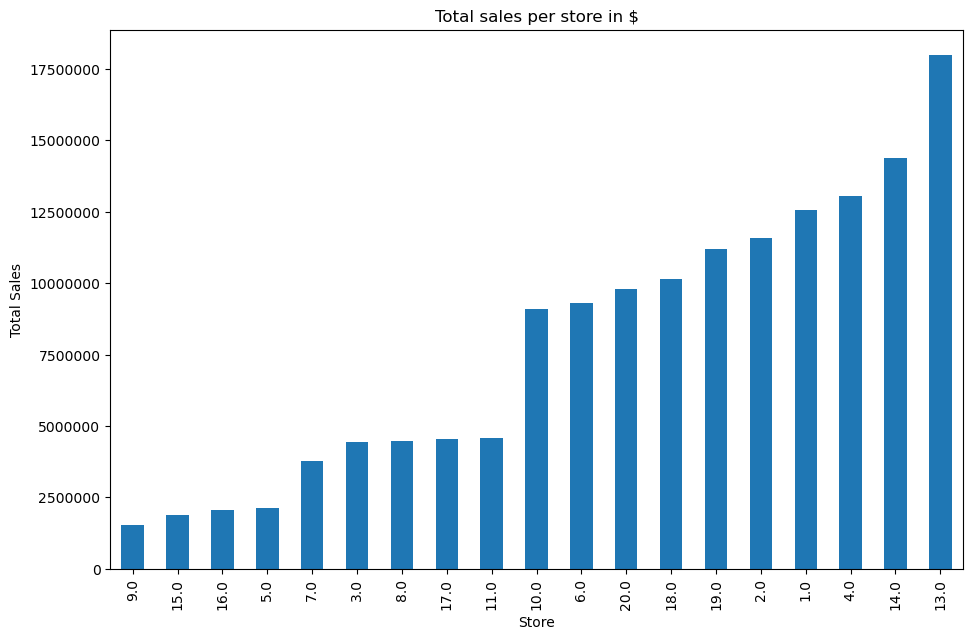

In [418]:
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values() 

plt.figure(figsize=(11,7))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total sales per store in $')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar');

Store 13 has the best performance in terms of turnover

In [419]:
# Identify groups of stores with the largest variations in weekly sales
max_std = df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending = False)
max_std

Store
4.0     326041.867113
11.0    259483.810377
2.0     253623.857301
13.0    197428.541972
18.0    189554.959776
20.0    174288.575660
14.0    118009.747587
17.0    116637.409562
10.0    103914.573716
19.0    101501.014627
1.0      92724.740321
6.0      86249.338274
7.0      76491.857613
16.0     75750.777278
15.0     64109.690507
8.0      60411.105004
3.0      30805.003214
5.0      30082.373648
9.0      18246.959624
Name: Weekly_Sales, dtype: float64

Stores 4, 11, 2 are subject to significant turnover seasonality

### Target VS CPI

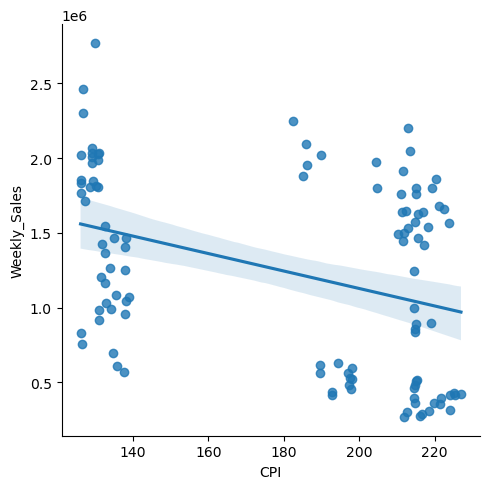

In [420]:
sns.lmplot(x='CPI', y='Weekly_Sales', data=df);

It seem that the weekly sales are influenced negatively by CPI (consumer price index) 

In [421]:
# Create a copy Dataframe 
df_copy = df.copy()

df_copy.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
0,6.0,1572117.54,nan,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


In [422]:
print(df_copy['Weekly_Sales'].isnull().sum())
print(df_copy['CPI'].isnull().sum()) 

0
9


## Pearson test : For continuous variables

In [423]:
# Replace NaN values by mean : statistical tests must be performed on columns with no missing values

# Calcule mean CPI
mean_cpi = df_copy['CPI'].mean()

# Replace missing values by mean
df_copy['CPI'].fillna(mean_cpi, inplace=True)

# Check missing values'CPI'
missing_values = df_copy['CPI'].isnull().sum()
print("missing values in 'CPI' column:", missing_values)

missing values in 'CPI' column: 0


In [436]:
# Calculate correlation and p-value
correlation, p_value = pearsonr(df_copy['Weekly_Sales'], df_copy['CPI'])

# Display results
print("Corrélation : ", correlation)
print("P-value : ", p_value)

# H0 hypothesis
alpha = 0.05
if p_value < alpha:
    print("We reject H0: The Weekly_Sales are not negatively influenced by inflation.")
else:
    print("We cannot reject H0: Weekly_Sales are negatively influenced by inflation.")

Corrélation :  -0.3408403040162866
P-value :  0.00016963261185758225
We reject H0: The Weekly_Sales are not negatively influenced by inflation.


Our results are now statistically significant ! Rising inflation reduces sales.

### Temperature

In [425]:
import plotly.express as px

# List unique value in 'Year' column
unique_years = df['Year'].unique()

# For loop to create the graph for each year
for year in unique_years:
    # Filter data for the given year
    filtered_data = df[df['Year'] == year]
    
    # Create chart
    fig = px.box(filtered_data, x='Year', y='Temperature')
    
    # Set options
    fig.update_layout(
        title=f'Temperature Analysis - Year {year}',     
    )
    
    # Afficher le graphique
    fig.show()

There are wide disparities in temperature between years. 2010 was much colder than other years.

### Temperature & Weekly sales

In [426]:
# Create chart
fig = px.scatter(df, x='Temperature', y='Weekly_Sales', color='Year')

# Set option
fig.update_layout(
    title='Weekly sales according to temperature',
    )

fig.show()

## Pearson test

In [427]:
print(df_copy['Temperature'].isnull().sum()) 

11


In [428]:
# Replace NaN values with median
df_copy['Temperature'] = df_copy['Temperature'].fillna(df_copy['Temperature'].median())

# Calculate correlation and p-value
correlation_2, p_value_2 = pearsonr(df_copy['Weekly_Sales'], df_copy['Temperature'])

# Display results
print("Corrélation : ", correlation_2)
print("p-value : ", p_value_2)

alpha = 0.05
if p_value_2 < alpha:
    print("We reject H0: The Weekly_Sales are negatively influenced by Temperature.")
else:
    print("We cannot reject H0")

Corrélation :  -0.11981473829625804
p-value :  0.1981917045778321
We cannot reject H0


### Unemployment & Weekly_Sales

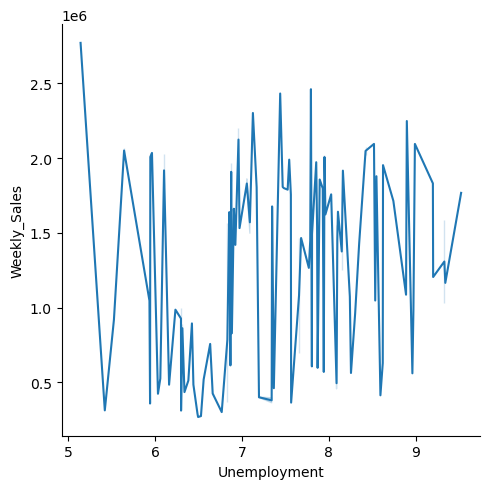

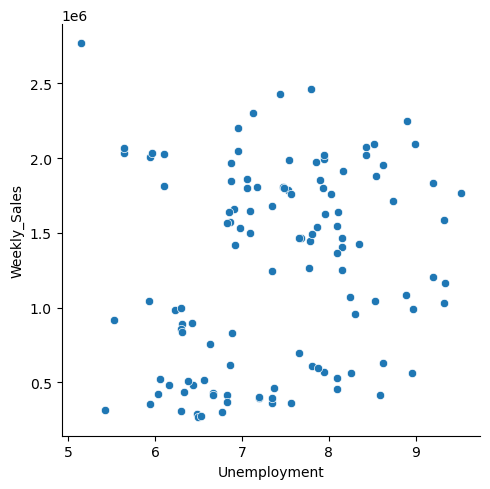

In [429]:
sns.relplot(x='Unemployment', y='Weekly_Sales', kind='line', data = df );
sns.relplot(x='Unemployment', y='Weekly_Sales', data = df );

 It seems there is a link between weekly sales augmentation and Unemployment rate increasement.

## Pearson test

In [430]:
print(df_copy['Unemployment'].isnull().sum())

0


In [440]:
# Calculate correlation and p-value
correlation, p_value = pearsonr(df_copy['Weekly_Sales'], df_copy['Unemployment'])

# Display results
print("Corrélation : ", correlation)
print("p-value : ", p_value)

alpha = 0.05
if p_value < alpha:
    print("We reject H0: Sales are not positively affected by the unemployment rate.")
else:
    print("We cannot reject H0")

Corrélation :  0.1902102339440042
p-value :  0.0399620118174451
We reject H0: Sales are not positively affected by the unemployment rate.


Our results are now statistically significant ! We can confirm than Weekly Sales are positively affected by unemployment rate

### Weekly_sales VS year

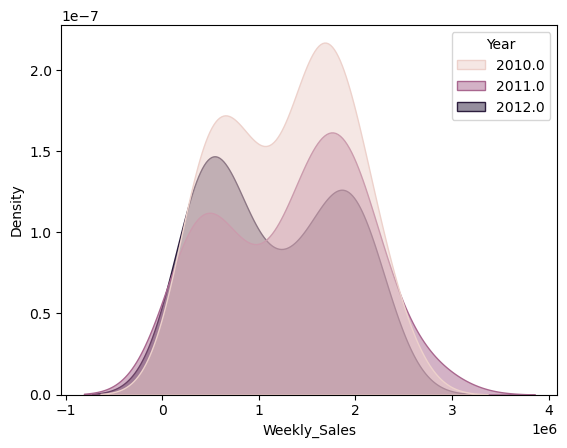

In [ ]:
sns.kdeplot(data=df, x="Weekly_Sales", hue="Year", fill=True, alpha=.5);

It seems there is a diminution of weekly sales between 2010 and 2012

### Weekly sales VS Month

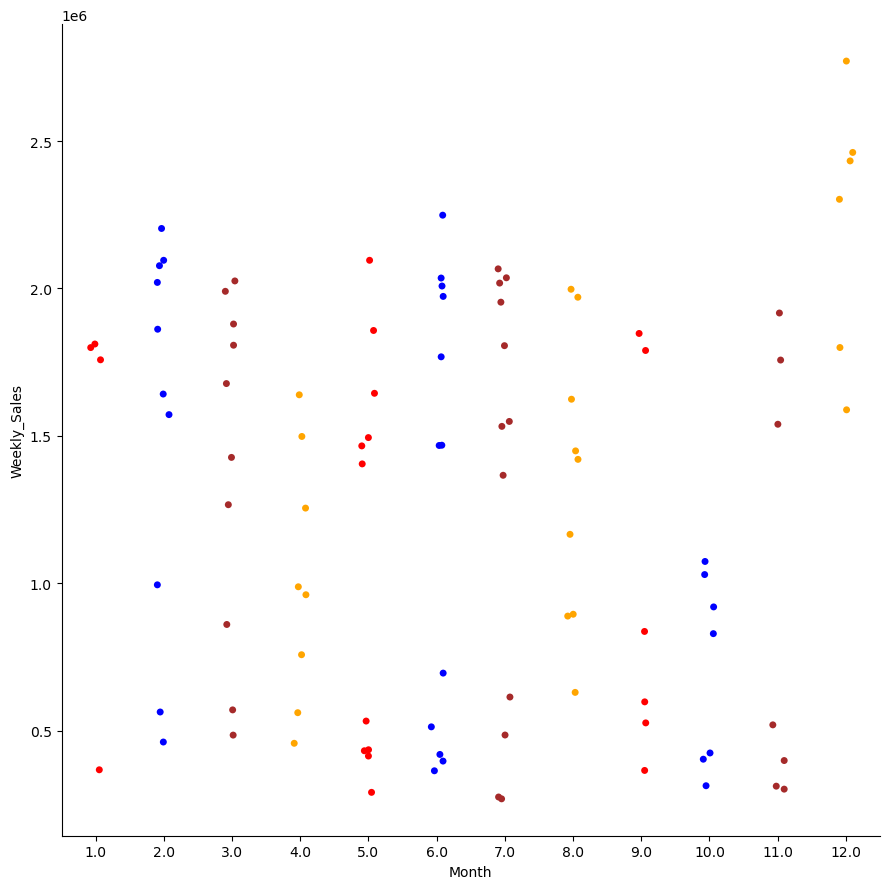

In [ ]:
sns.catplot(x='Month', y='Weekly_Sales', palette=['red', 'blue', 'brown', 'orange'], data=df, height = 9);

It seems in december there is an augmentation of weekly sales

### Year VS Fuel price

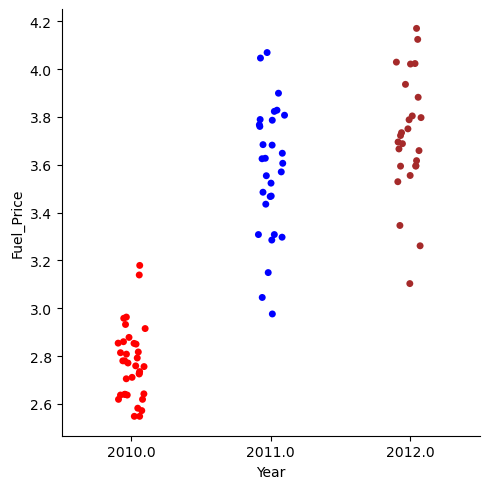

In [ ]:
sns.catplot(x='Year', y='Fuel_Price', palette=['red', 'blue', 'brown', 'orange'], data=df);

Petrol prices rose significantly between 2010 and 2012

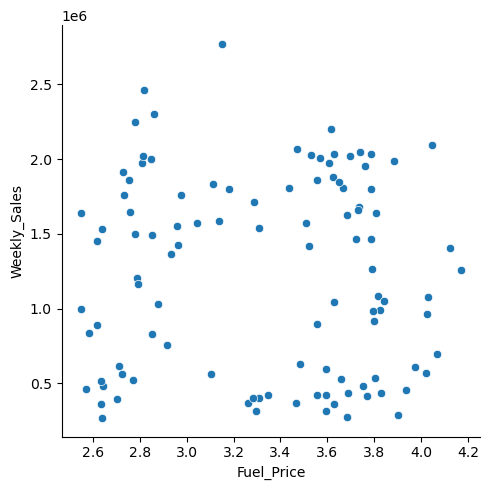

In [ ]:
sns.relplot(x='Fuel_Price', y='Weekly_Sales', data = df );

It seems there is no correlation between Fuel price and weekly sales

### Pearson Test: used for continuous variables

In [443]:
print(df_copy['Fuel_Price'].isnull().sum())

0


In [ ]:
df_copy.dropna(subset=['Fuel_Price'], inplace=True) # statistical tests must be performed on columns with no missing values
print(df_copy['Fuel_Price'].isnull().sum())

0


In [442]:
# Replace NaN values with the average
df_copy['Fuel_Price'] = df_copy['Fuel_Price'].fillna(df_copy['Fuel_Price'].mean())

# Calculate correlation and p-value
correlation, p_value= pearsonr(df_copy['Weekly_Sales'], df_copy['Fuel_Price'])

# Display results
print("Corrélation : ", correlation)
print("p-value : ", p_value)

alpha = 0.05
if p_value_2 < alpha:
    print("We reject H0: The Weekly_Sales are negatively influenced by Temperature.")
else:
    print("We cannot reject H0")

Corrélation :  -0.03470886606928676
p-value :  0.710254083701383
We cannot reject H0


In [ ]:
cat_variables = ['Store', 'Holiday_Flag']
num_variables = ['Température', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_of_week']

In [ ]:
# Correlation matrix
corr_matrix = df.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

There is a huge correlation between 'Fuel_Price' and 'Year' it could be necessary to drop one of these columns

In [ ]:
# Enregistrer le DataFrame en tant que fichier CSV
df.to_csv(r'C:\Users\33760\Desktop\FULLSTACK\FULLSTACK\Projet\BLOC 3\Walmart\data\clean_file_walmart.csv', index=False)

### Report:

## The Weekly_Sales are negatively influenced by CPI augmentation

## Weekly Sales are positively affected by unemployment rate